## Setup



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## load Dataset

In [2]:
data = pd.read_csv('data.csv')

data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Data Spliting

In [3]:
data_input  = data.drop(columns = 'y')
data_output = data['y']

data_input.head()

,x
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size = 0.2, random_state = 42)

y_train_pred = []

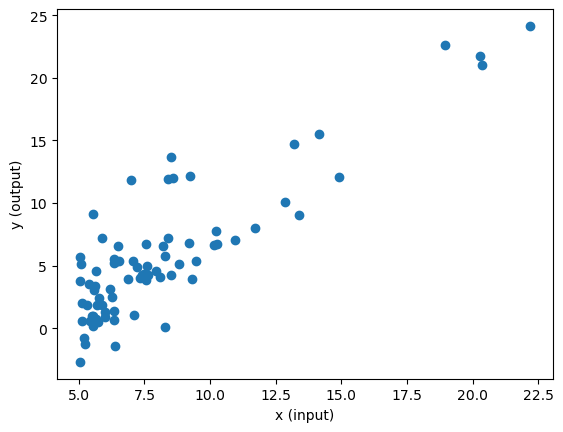

In [5]:
plt.scatter(X_train, y_train)
plt.xlabel('x (input)')
plt.ylabel('y (output)')
plt.show()

In [6]:
xTrain = np.array(X_train)
yTrain = np.array(y_train)
xTest = np.array(X_test)
yTest = np.array(y_test)

---

## Hypothesis Function

$$h_θ(x) = θ_0 + θ_1x$$

In [7]:
def hypo(x, theta0, theta1):
    return theta0 + theta1 * x

## Cost Function

$$J(θ_0, θ_1) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})$$

In [8]:
def cost_function(x, y, theta0, theta1):
    m = len(x)
    J = 0
    for i in range(m):
        y_p = hypo(x[i], theta0, theta1)
        J += (y_p - y[i]) ** 2
        y_train_pred.append(y_p)
    J = J / (2 * m)

    return J


### Gradient Descent

$$\theta_0 := \theta_0 - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})$$

$$\theta_1 := \theta_1 - \frac{\alpha }{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

In [9]:
def gradient_descent(x, y, theta0, theta1, alpha, iterations):
    cost_history = np.zeros(iterations)
    m = len(x)

    for it in range(iterations):

        theta0_gradient = 0
        theta1_gradient = 0

        for i in range(m):
            y_p = hypo(x[i], theta0, theta1)
            theta0_gradient += (y_p - y[i])
            theta1_gradient += (y_p - y[i]) * x[i]

        theta0 = theta0 - (alpha / m) * theta0_gradient
        theta1 = theta1 - (alpha / m) * theta1_gradient

        cost_history[it] = cost_function(x, y, theta0, theta1)

        print(f'iteration {it}: theta = ({theta0}, {theta1}), cost function = {cost_history[it]}')


    return theta0, theta1 , cost_history



## Train Model

In [10]:
def train_model(X, y, alpha, num_iterations):
    theta0 = np.random.uniform(0, 1)
    theta1 = np.random.uniform(0, 1)

    theta0, theta1, cost_history = gradient_descent(X, y, theta0, theta1, alpha, num_iterations)

    return theta0, theta1, cost_history

In [11]:
alpha = 0.01
num_iterations = 1500

t0, t1, cost_history = train_model(xTrain, yTrain, alpha, num_iterations)

C:\Users\mazen\AppData\Local\Temp\ipykernel_7652\430831315.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[it] = cost_function(x, y, theta0, theta1)


iteration 0: theta = ([0.61772387], [0.76630899]), cost function = 6.12493731279319
iteration 1: theta = ([0.60664279], [0.74616266]), cost function = 6.090118058769845
iteration 2: theta = ([0.59731214], [0.7429697]), cost function = 6.081084611395345
iteration 3: theta = ([0.58833467], [0.7430801]), cost function = 6.073056608008141
iteration 4: theta = ([0.57943799], [0.74383319]), cost function = 6.065092437942894
iteration 5: theta = ([0.57056898], [0.74471032]), cost function = 6.057156239400583
iteration 6: theta = ([0.56171728], [0.74561042]), cost function = 6.04924656461306
iteration 7: theta = ([0.55288084], [0.74651377]), cost function = 6.041363273650548
iteration 8: theta = ([0.54405924], [0.74741655]), cost function = 6.033506276557568
iteration 9: theta = ([0.53525238], [0.748318]), cost function = 6.025675485559713
iteration 10: theta = ([0.52646023], [0.74921798]), cost function = 6.017870813246801
iteration 11: theta = ([0.51768275], [0.75011646]), cost function = 6.

In [12]:
print(f'theta0 = {t0}, theta1 = {t1}')


theta0 = [-4.29522578], theta1 = [1.24277868]


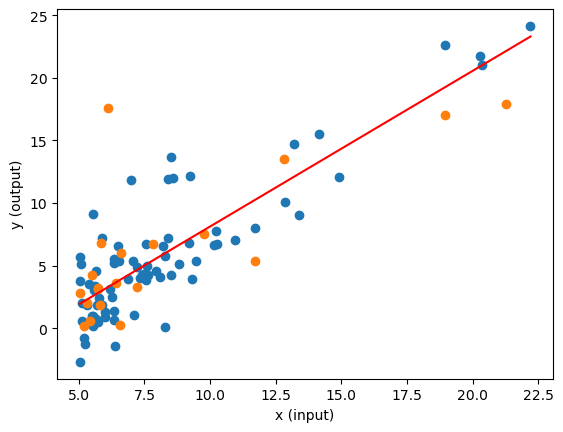

In [13]:
plt.scatter(xTrain, yTrain)
plt.scatter(xTest, yTest)

x_line = [min(xTrain), max(xTrain)]
y_line = [hypo(x, t0, t1) for x in x_line]

plt.plot(x_line, y_line, 'r-')

plt.xlabel('x (input)')
plt.ylabel('y (output)')
plt.show()

## Accuracy & Error Calc.
using R2 Score & Mean Square Error

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
y_test_pred = np.array([hypo(x, t0, t1) for x in xTest])

In [16]:
r2 = r2_score(y_test, y_test_pred)
print(f'R2 = {r2}')

R2 = 0.5197058106540011


In [17]:
y_test_pred = np.array([hypo(x, t0, t1) for x in xTest])
mse = mean_squared_error(y_test, y_test_pred)
print(f'MSE = {mse}')

MSE = 15.100623656025482


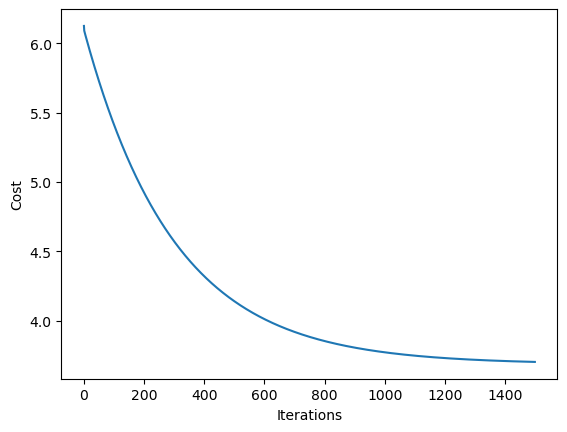

In [18]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()